In [219]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [236]:
def read_dataset():
    
    with open('Training_SpikeTrains.txt') as fp:
        data = [list(map(int, line.strip().split('\t'))) for line in fp]
        flat_list = [item for data_list in data for item in data_list]
    
    training_spikes_chunks = [flat_list[spike_index : spike_index + 36]
                                    for spike_index in range(0, len(flat_list), 36)]
    

    with open('Angle_Training.txt') as fp:
        angle_training = [list(map(float, line.strip().split('\t'))) for line in fp]
        angles = [item for data_list in angle_training for item in data_list]
        
    with open('Testing_SpikeTrains.txt') as fp:
        data_spikes = [list(map(int, line.strip().split('\t'))) for line in fp]
        testing_spikes = [item for data_list in data_spikes for item in data_list]
    
    testing_spikes_chunks = [testing_spikes[spike_index : spike_index + 36]
                                    for spike_index in range(0, len(testing_spikes), 36)]
    
    with open('Angle_Testing.txt') as fp:
        angles_test = [list(map(float, line.strip().split('\t'))) for line in fp]
        angles_testing = [item for data_list in angles_test for item in data_list]
        
    return training_spikes_chunks, angles, testing_spikes_chunks, angles_testing


In [214]:
def sort_target_into_labels(target):
    
    labelled_target = []
    
    for angle in target:
        
        if(angle >= 0 and angle <=90):
            angle_label = '0 to 90'
        if(angle >= 90 and angle <=180):
            angle_label = '90 to 180'
        if(angle >= 180 and angle <= 270):
            angle_label = '180 to 270'
        if(angle >= 270 and angle <= 360):
            angle_label = '270 to 360'
        
        labelled_target.append(angle_label)
        
    return labelled_target

In [220]:
def plot_accuracies(accuracies):
    
    k_neighbours = np.arange(1,301)
    
    plt.plot(k_neighbours, accuracies, label = 'Testing dataset Accuracy')
    

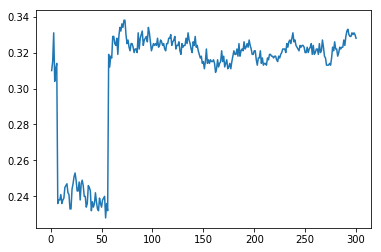

In [237]:
training_spikes, training_angles, testing_spikes, testing_angles = read_dataset()
labelled_target = sort_target_into_labels(training_angles)
labelled_target_testing = sort_target_into_labels(testing_angles)

classifier_accuracies = []

for k in range(1, 301):
    
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(training_spikes, labelled_target)

    predicted_angles = knn.predict(testing_spikes)
    accuracy = accuracy_score(labelled_target_testing, predicted_angles)

    classifier_accuracies.append(accuracy)

plot_accuracies(classifier_accuracies)